# Universidad EAFIT. Métodos Numéricos para Ingeniería - Miniproyecto 1

### Docente: Daniel Giraldo Cuartas
### Estudiantes: Karol Andrea Peña Arango, Juan Manuel Arboleda Londoño & Julían Andrés Solano Zapardiel

En el presente cuaderno se expone lo desarrollado en el miniproyecto numero 1 de la asignatura de Métodos Numéricos
para Ingeniería, en el cual se abordaron diferentes problemas de los métodos numéricos como la aproximación e interpolación de funciones, la integración numérica 1D y 2D, y el tratamiento de mallas.

### Librerías que se utilizan:

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pyvista as pv
import meshio
import trimesh
from scipy.integrate import quad
import math 

# 1. Aproximación de funciones con el Método de proyección de Galerkin

Utilizando el metodo de proyeccion de Galerkin encuentre los coeficientes que permiten aproximar la función en cada caso. Se sabe que una función aproximada se escrie de la siguiente manera 

$$ f(x) \approx \sum_{i=0}^{n} \alpha_i u_i(x) $$

Se tiene como problema encontrar los coeficientes $\alpha_i$ con los cuales se obtenga un error muy bajo entre la función real y la función aproximada.

Para darle solución a este problema, se define una siguiente función en la que se hace la aproximación nuemérica, en esta se incluye una matriz $A$ que contiene las funciones base que sirven para aproximar la función original; esta también contiene un vector $x$ en donde están los coeficientes $\alpha_i$, y por útltimo se tiene el vector $b$ del producto de la función a aproximar con la funcón base. Es decir, se tiene el siguiente sistema: 


$$A = [a_{ij}] = \mathbf{u}_i(x)\cdot \mathbf{u}_j(x) = \int \limits _\Omega u_i(x) u_j(x) dx $$

$$b = [b_i] = f(x) \cdot \mathbf{u}_i(x)  = \int \limits _\Omega f(x) u_i(x)dx$$

$$x = \alpha_i $$

De lo anterior, el problema toma la siguiente solución:  $$ x = A^{-1}b $$

Esta función está basada en la función ***aproximacion_numerica*** creada por **© Daniel Giraldo Cuartas 2022**

In [8]:
def aproximacion_num(f, ui, lim):
    n = len(ui)                                                                 # Numero de iteraciones (cantidad de funciones base) 
    x = sym.Symbol('x')                                                         # Simbolo de la variable independiente 
    A = sym.zeros(n,n)                                                          # Matriz de la longitud de la cantidad de polinomios
    b = sym.zeros(n,1)                                                          # Vector de la funcion por el polinomio

    for i in range(n):
        for j in range(i, n): 

            funcion = sym.lambdify(x, ui[i]*ui[j])                              # Se toma valores numerico para "x" y con ellos se evalua ui[i]*ui[j]

            A[i,j] = quad(funcion, lim[0], lim[1])[0]                           # Integra la funcion de lambda en los limites establecidos y lo asocia a las posiciones i j de la matriz
            A[j,i] = A[i,j]

        funcion = sym.lambdify(x, ui[i]*f)

        b[i,0] = quad(funcion, lim[0], lim[1])[0]                               # Integra la funcion de lambda en los limites establecidos y toma solo el valor asociado a i

    alp = A.LUsolve(b)                                                          # Se resuelve el sistema para encontrar los coeficientes

    fg= 0                                                                       # Se inicia la función aproximada en cero 

    for i in range(n):
        fg += alp[i,0]*ui[i]                                                    # Se va agregando en cada iteracion

    funcion = sym.lambdify(x, (f-fg)*(f-fg))
    e  = np.sqrt(quad(funcion, lim[0], lim[1])[0])                              # Magnitud del error

    print(f"La magnitud del error entre la funcion real y la aproximada es de:\n {e}")

    return A, b, fg, alp

    

$a.$ Aproximar $tan(x)$ sobre el conjunto {1, $e^{−x}$, $e^{−2x}$, $e^{x}$, $e^{2x}$}, en el intervalo [0, π/4]

El error entre la funcion real y la aproximada es de:
 0.00011111664875482143

La funcion aproximada es: 
 0.296475608312038*exp(2*x) - 0.731803087250492*exp(x) + 2.00072056418756 - 2.0036617319948*exp(-x) + 0.438611370407534*exp(-2*x)



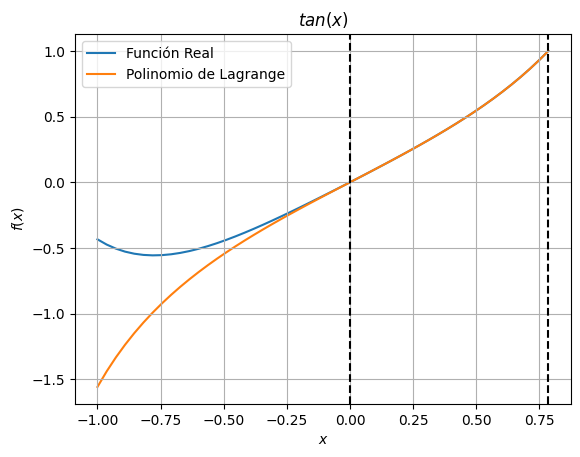

In [4]:
x = sym.Symbol('x')                                                                     # Variable independiente de forma simbolica
f = sym.tan(x)                                                                          # Funcion a aproximar
ui = [1, sym.exp(-x), sym.exp(-2*x), sym.exp(x), sym.exp(2*x)]                          # Funciones base de aproximacion
lim = [0, (np.pi)/4]                                                                    # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

fg                                                                                      # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO  
xp = np.linspace(-1, (np.pi)/4)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x,f)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title("$tan(x)$")
ax1.axvline(0, color='k', linestyle='--')
ax1.axvline((np.pi)/4, color='k', linestyle='--')
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

El área encerrada por las lineas punteadas corresponde al áreal entre los limites solicitados y de mejor aproximación

$b.$ Aproximar $f(x) = \frac{d^2}{dx^2}(e^{-x^2})$, sobre el conjunto {$sin(iπx)$, $cos(iπx)$}, con $i$ ∈ ${1, 2, 3}$, en el intervalo $[−5, 5]$

El error entre la funcion real y la aproximada es de:
 1.8220231109328386

La funcion aproximada es: 
 -0.296705771889363*cos(3.14159265358979*x) - 0.00072385230661013*cos(6.28318530717959*x) - 7.11477485870297e-9*cos(9.42477796076938*x) - 2.11642378651709e-11*cos(12.5663706143592*x) + 1.55992771366842e-11*cos(15.707963267949*x) - 1.17961571484188e-11*cos(18.8495559215388*x) + 9.1516028101709e-12*cos(21.9911485751286*x) - 7.27536839878683e-12*cos(25.1327412287183*x)



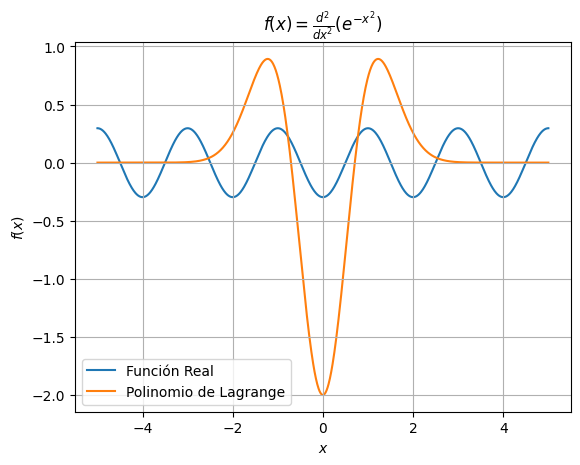

In [5]:
x = sym.Symbol('x')                                                                     # Variable independiente de forma simbolic                                     
derivada_2 = sym.exp(-x**2).diff(x,x)                                                   # Funcion a aproximar
ui = []                                                                                 # Funciones base de aproximacion
lim = [-5,5]                                                                            # Rango en el que se hace la integracion

ni = 8

for i in range(1, ni+1):
    ui.append(sym.sin(i*np.pi*x))
    ui.append(sym.cos(i*np.pi*x)) 

A, b, fg, alp = aproximacion_num(derivada_2,ui, lim)

fg                                                                                      # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO DE LAS FUNCIONES
xp = np.linspace(-5,5,1000)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x, derivada_2)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title(r"$f(x) = \frac{d^2}{dx^2}(e^{-x^2})$")
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()


$c.$ f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$, sobre el conjunto {$1, x, x^{2}, x^{3}, x^{4}, x^{5}$}, en el intervalo [−2, 4]

El error entre la funcion real y la aproximada es de:
 0.35395011099056606

La funcion aproximada es: 
 -0.0118957196778012*x**5 + 0.0535719952843212*x**4 + 0.0630927148339173*x**3 - 0.412976319014695*x**2 - 0.0350468286446076*x + 0.844037636831369



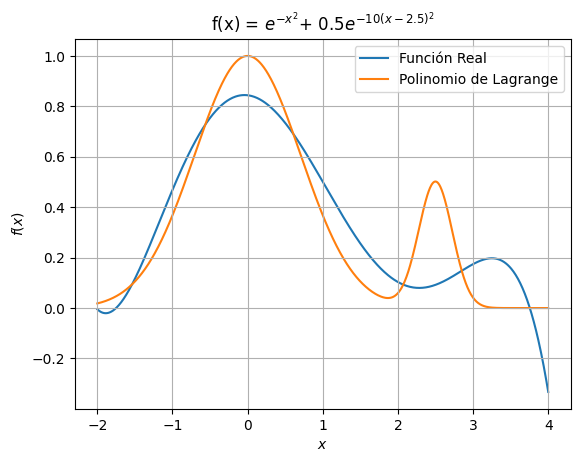

In [6]:
x = sym.Symbol('x')                                                                 # Variable independiente de forma simbolica
f = sym.exp(-x**2) + 0.5 * sym.exp(-10*(x-2.5)**2)                                  # Funcion a aproximar
ui = [1, x, x**2, x**3, x**4, x**5]                                                 # Funciones base de aproximacion
lim = [-2, 4]                                                                       # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

fg                                                                                  # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO DE LAS FUNCIONES
xp = np.linspace(-2, 4,1000)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x, f)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title(r"f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$")
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

# 2. Método de interpolación de Lagrange


Utilice el metodo de interpolación de Lagrange para encontrar un polinomio que se ajuste a la funcion. Para esto se concidera la expresión para la interpolación de lagrange:
 
$$ f(x) = y_j(x_i) = \sum_{j=0}^{n} \alpha_j u_j(x_i) $$

Con este método de busca el polinmio de orden $n$ que pase por un conjunto de $n+1$ puntos, considerando que 

$$y_j(x_i) = \begin{cases}1, & \text{si } i = j \\0, & \text{si } i \neq j\end{cases}$$

Esta función está basada en la función ***lagrange*** creada por **© Daniel Giraldo Cuartas 2022**

In [7]:
def lagrange(xi, yi):
    n  = len(xi)                                                # Numero de iteraciones
    x  = sym.Symbol('x')
    ui = sym.ones(n, 1)                                         # Arreglo de polinomios 
    b = sym.zeros(n, 1)                                         # Funcion a aproximar
    
    for i in range(n):
        b[i] = yi[i]
        for j in range(n):
            if i!=j:
                ui[i] *= (x-xi[j])/(xi[i] - xi[j])              # Cuando i es diferente de j debe dar cero 
    
    polinomio = 0
    for i in range(n):
        polinomio += b[i]*ui[i,0]   
        
    return ui, polinomio

La funcion aproximada es: 
 0.5*x*(0.25 - 0.75*x)*(0.4 - 0.6*x)*(0.5 - 0.5*x)*(-3.0*x - 2.0)*(-1.5*x - 0.5) - 0.625000000000003*x*(0.333333333333333 - 1.0*x)*(0.5 - 0.75*x)*(0.6 - 0.6*x)*(-3.0*x - 1.0)*(3.0*x + 3.0) - 1.75*x*(0.5 - 1.5*x)*(0.666666666666667 - 1.0*x)*(0.75 - 0.75*x)*(1.5*x + 1.5)*(3.0*x + 2.0) + 2.75*x*(1.5 - 1.5*x)*(2.0 - 3.0*x)*(0.75*x + 0.75)*(1.0*x + 0.666666666666667)*(1.5*x + 0.5) + 1.625*x*(3.0 - 3.0*x)*(0.6*x + 0.6)*(0.75*x + 0.5)*(1.0*x + 0.333333333333333)*(3.0*x - 1.0) + 0.5*x*(0.5*x + 0.5)*(0.6*x + 0.4)*(0.75*x + 0.25)*(1.5*x - 0.5)*(3.0*x - 2.0)


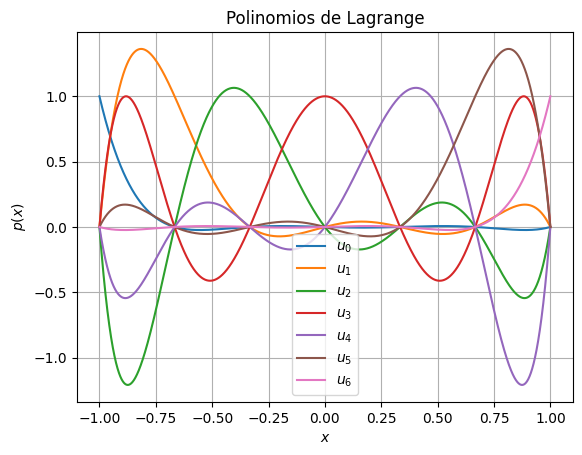

In [10]:
x = sym.Symbol('x')    
n = 7                                                           # Polinomio de orden n requiere n+1 puntos (poli 5 pun 6)
funcion = ((sym.sin(np.pi*x))**2)+(x/2)                         # Funcion a aproximar
lim = [-1,1]

Xi = np.linspace(lim[0],lim[1], n)                              # Intervalo de interpolacion dividido en n+1 puntos (6)
Fi = sym.lambdify(x, funcion)(Xi)

ui, fl = lagrange(Xi, Fi)

print(f"La funcion aproximada es: \n {fl}")                         #Polinomio lagrange

# GRAFICA DE POLINOMIOS INTERPOLANTES
x2  = np.linspace(lim[0],lim[1], 10000)
y2 = sym.lambdify(x, funcion)(x2) 
plt.figure()
for i,u in enumerate(ui):
    px = sym.lambdify(x, u)(x2)
    plt.plot(x2,px, label=f"$u_{i}$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.title(f"Polinomios de Lagrange")
plt.legend()

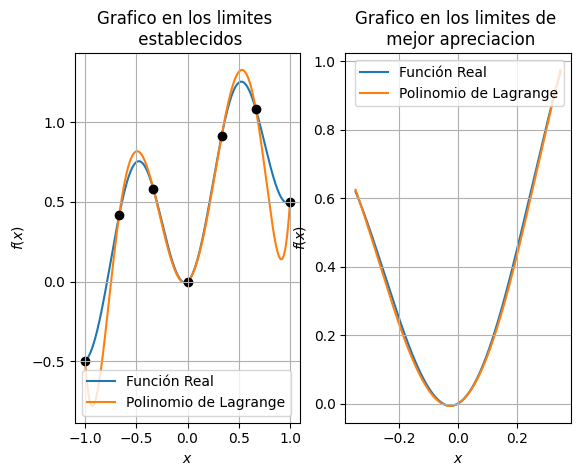

In [9]:
yl= sym.lambdify(x, fl)(x2)                                             # Polinomio de lagrange evaluada en el mismo rango de la funcion original

xb = np.linspace(-0.35, 0.35, 10000)                                    # Limites en los que se ve una mejor aproximacion
y2b = sym.lambdify(x, funcion)(xb)                                      # Funcion real evualauda en los nuevos limites
ylb= sym.lambdify(x, fl)(xb)                                            # Polinomio de lagrange evaluada en los nuevos limites


# GRAFICO 
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x2,y2, zorder=0, label="Función Real")
ax1.plot(x2,yl, zorder=1, label="Polinomio de Lagrange")
ax1.set_title("Grafico en los limites \n establecidos")

ax1.scatter(Xi, Fi, c='k')
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

#-------------------------------------------------------------------

ax2.plot(xb,y2b, zorder=0, label="Función Real")
ax2.plot(xb,ylb, zorder=1, label="Polinomio de Lagrange")
ax2.set_title("Grafico en los limites de \n mejor apreciacion")

ax2.grid()
ax2.set_xlabel("$x$")
ax2.set_ylabel("$f(x)$")
ax2.legend()

# 3. Integración 1D
#### Integral:
$$\int \limits_{0}^{8}\left(sin^2(\pi x) + cos(x)\right)dx$$

Funciones para la integración numérica con el método de Cuadratura Gaussiana: 

In [3]:
def numerical_integration_1D(xa, xb, f, n): # Función para la integración numérica en un segmento con n puntos de cuadratura
    points, wi = np.polynomial.legendre.leggauss(n) # Puntos y pesos de cuadratura gaussiana
    
    m = (xb-xa)/2
    b = (xa+xb)/2
    xi = m*points + b    # Transformación del dominio

    yi = sym.lambdify(x, f)(xi) # Función en el dominio x = [-1: 1]
    area = (xb-xa)*sum(wi*yi)/2 # Integral en el segmento
    return area

def segmented_1D_numerical_integration(la, lb, n, f): # Función para la integración numérica en n segmentos
    xn = np.linspace(la, lb, n+1) # Subdivisión del dominio de integración en n segmentos

    integral = 0
    for j in range(n): # Integración numérica para cada segmento
        xa = xn[j] # Extremo izquierdo del segmento
        xb = xn[j+1] # Extremos derecho del segmento

        area = numerical_integration_1D(xa, xb, f, 2) # Integral en el segmento
        integral += area # Integral total (sumatoria de la integral en cada segmento)
    return integral

Solución analítica:

In [4]:
x = sym.Symbol('x') # variable x simbólica
f = (sym.sin(sym.pi*x))**2 + sym.cos(x) # Función simbólica

la, lb = (0, 8) # Limites de integración

analyticalIntegral = round(sym.integrate(f, (x, la, lb)),5) # Cálculo de la integral analítica
print('Integral real: ', round(analyticalIntegral,5))

Integral real:  4.98936


Integración para el dominio subdividido en n segmentos, utilizando 2 puntos de cuadratura en cada uno de ellos y luego se suma el resultado; Integración en todo el dominio utilizando n puntos de cuadratura; Y comparacion del el error relativo de los dos métodos.

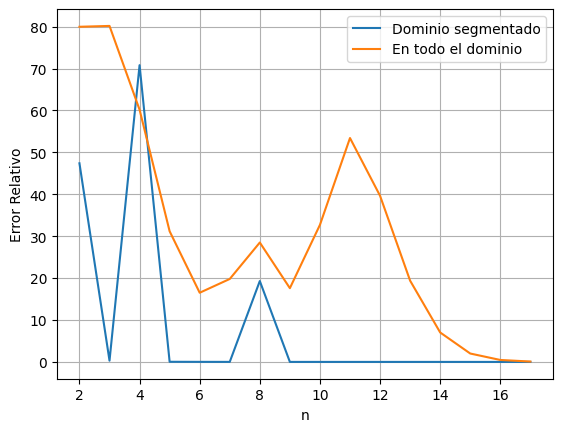

In [5]:
n = 17 # Parámetro n de los dos métodos

# Definición de las variables
n_Integrals_SegmentedDomain = [] # Valor de la integral segmentando el dominio en n segmentos (n = [2, 3, ..., n])
n_Integrals_FullDomain = [] # Valor de la integral utilizando n puntos de cuadratura en todo el dominio (n = [2, 3, ..., n])
errorR_SegmentedDomain = [] # Error relativo de la integral segmentando el dominio en n segmentos (n = [2, 3, ..., n])
errorR_FullDomain = [] # Error relativo de la integral utilizando n puntos de cuadratura en todo el dominio (n = [2, 3, ..., n])

ns = np.arange(2, n+1, 1) # arreglo con los valores del parámetro n (n = [2, 3, ..., n])

for n in ns: # cálculo de la integral utilizando las dos maneras
    integral = segmented_1D_numerical_integration(la, lb, n, f) # Valor de la integral segmentando el dominio en n segmentos y utilizando dos puntos de cuadratura para cada uno
    n_Integrals_SegmentedDomain.append(integral) # se agrega el valor de la integral al arreglo
    errorR_SegmentedDomain.append(round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3)) # se calcula el error relativo del método y se agrega al arreglo
    
    integral = numerical_integration_1D(la, lb, f, n) # Valor de la integral utilizando n puntos de cuadratura en todo el dominio
    n_Integrals_FullDomain.append(integral) # se agrega el valor de la integral al arreglo
    errorR_FullDomain.append(round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3)) # se calcula el error relativo del método y se agrega al arreglo

# Se grafica el error relativo para los dos métodos según el parámetro n
plt.figure()
plt.plot(ns, errorR_SegmentedDomain, label = "Dominio segmentado")
plt.plot(ns, errorR_FullDomain, label = "En todo el dominio")
plt.grid()
plt.xlabel("n")
plt.ylabel("Error Relativo")
plt.legend()

# 4. Mallas e Integración 2D
#### Integral:
$$\iint \limits_{\Omega} \left(sin(\pi x) \cdot cos^2(\pi y)\right) d\Omega$$
#### Dominio: 
$$\Omega = \left\lbrace 0, 5 \right\rbrace \times \left\lbrace 0, 2 \right\rbrace \ \cup \ \left\lbrace 2, 7 \right\rbrace \times \left\lbrace 2, 4 \right\rbrace$$

#### Solución analítica:
$$\int \limits_{0}^{2} \int \limits_{0}^{5} \left(sin(\pi x) \cdot cos^2(\pi y)\right) \, dx \, dy + \int \limits_{2}^{4} \int \limits_{2}^{7} \left(sin(\pi x) \cdot cos^2(\pi y)\right) \, dx \, dy$$

In [6]:
x, y = sym.symbols('x y') # Variables simbólicas
f = sym.sin(sym.pi*x)*sym.cos(sym.pi*y)**2 # funcion simbólica

xla1, xlb1 = (0, 5) # limites en x del primer rectangulo
xla2, xlb2 = (2, 7) # limites en x del segundo rectangulo
yla1, ylb1 = (0, 2) # limites en y del primer rectangulo
yla2, ylb2 = (2, 4) # limites en y del segundo rectangulo 

# calculo de la integral analitica
analyticalIntegral = round(sym.integrate(f, (y, yla1, ylb1), (x, xla1, xlb1)) + sym.integrate(f, (y, yla2, ylb2), (x, xla2, xlb2)),7)
print('Integral analítica: ', analyticalIntegral)

Integral analítica:  1.2732395


Para la integración 2D con el Método de Cuadraturas Gaussianas se hace uso de la función ***gaussian_integration_2D*** creada por **© Daniel Giraldo Cuartas 2022**:

In [7]:
def gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny):
    '''
        - p0, p1, p2, p3:
            Coordenadas de los punto (x,y) del cuadrilatero
        
        - fun:
            Funcion lambda f(x,y) a interpolar
            
        - nx, ny:
            Numero de puntos de cuadratura a utilizar en direccion
            x, y respectivamente.
    '''
    xi, wi = np.polynomial.legendre.leggauss(nx) # puntos y pesos de cuadratura en x
    yj, wj = np.polynomial.legendre.leggauss(ny) # puntos y pesos de cuadratura en y
    
    X = np.matrix([p0, p1, p2, p3]) # Matriz de puntos del cuadrilatero
    
    
    Nt = lambda r,s : 0.25*np.array([ # Matriz de transformacion (cambio de variable)
        (1-r)*(1-s),
        (1+r)*(1-s),
        (1+r)*(1+s),
        (1-r)*(1+s)
        ])
    
    Dt = lambda r,s : 0.25*np.array([ # Matriz para encontrar la matriz jacobiana según los puntos del cuadrilatero
        [s-1, r-1],
        [1-s, -1-r],
        [1+s, 1+r],
        [-1-s, 1-r]
        ]).transpose()
    
    integral = 0
    # calculo de la integral numérica
    for i in range(nx): #para los puntos y pesos de cuadratura en x
        rx = xi[i] # Valor de r según el punto de cuadratura
        wx = wi[i] # peso en x del punto de cuadratura
        for j in range(ny): #para los puntos y pesos de cuadratura en y
            sy = yj[j] # Valor de s según el punto de cuadratura
            wy = wj[j] # peso en y del punto de cuadratura
            
            J = Dt(rx, sy)*X # Matriz jacobiana
            det_J = np.linalg.det(J) # jacobiano 
            
            x_vec = Nt(rx, sy)*X # calculo de los puntos en x e y
            f_val = fun(x_vec[0,0], x_vec[0,1]) # se evalúa la función en los puntos anteriores
            integral += (f_val)*det_J*wx*wy # Calculo de la integral numérica
            
    return integral

El dominio de integracion $\Omega$ corresponde al mostrado en la siguiente figura. Para almacenar este dominio, se hace una malla con dos rectangulos apartir de los puntos dados.  

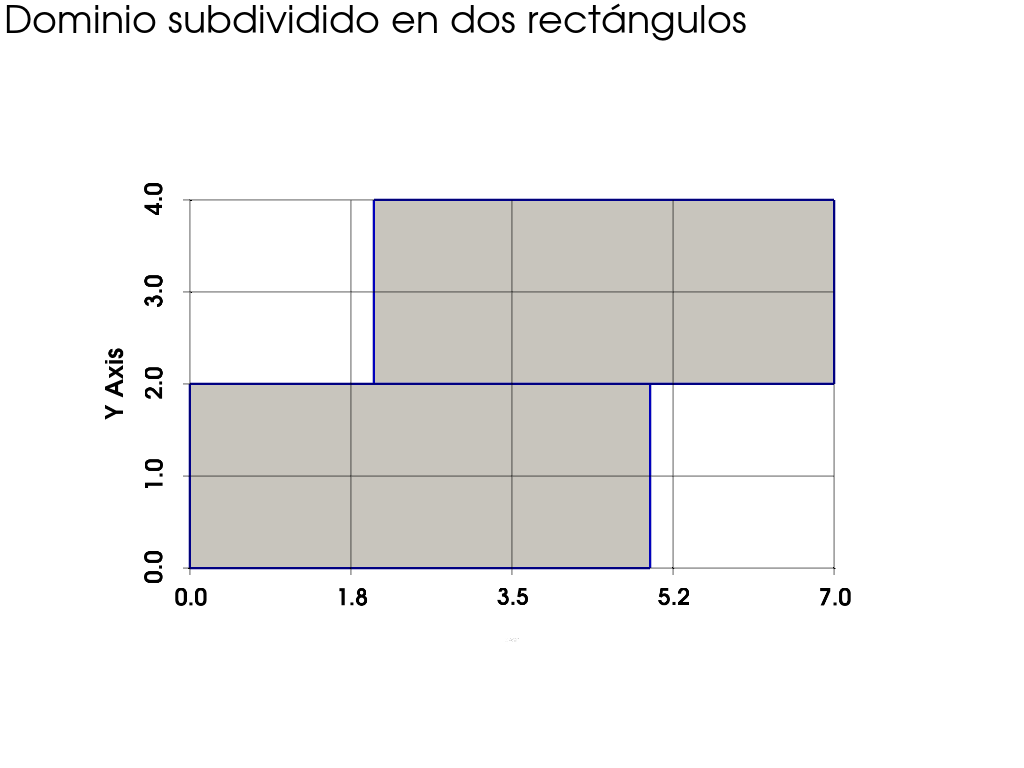

In [8]:
#malla inicial dada
points = np.array([ # puntos de la malla
    [0,0], 
    [5,0],
    [5,2],
    [0,2],
    ##
    [2,2],
    [7,2],
    [7,4],
    [2,4]
], dtype='float32')

rectangles = np.array([ # rectangulos de la malla
    [0,1,2,3],
    [4,5,6,7],
], dtype='int32')

cells = [("quad", rectangles)] # se definen los elementos como cuadrilateros 
original_mesh = meshio.Mesh(points, cells) # se almacena la malla

# Visualización de la malla
original_mesh_pv = pv.wrap(original_mesh) # objeto de datos correspondiente en pyvista

pl = pv.Plotter()
pl.add_mesh(original_mesh_pv, color='white')
pl.add_mesh(original_mesh_pv, color="blue", style='wireframe', line_width=3)
pl.add_text(f"Dominio subdividido en dos rectángulos", font_size=20)
pl.view_xy()
pl.show_grid()
pl.show(jupyter_backend='pythreejs')

A continuación se procede a subdividir en rectangulos la malla anterior en dos mallas estructuradas (a partir de los dos rectangulos que se tenían anteriormente) según la cantidad de rectangulos que se deseen en cada una de las dos direcciones. 

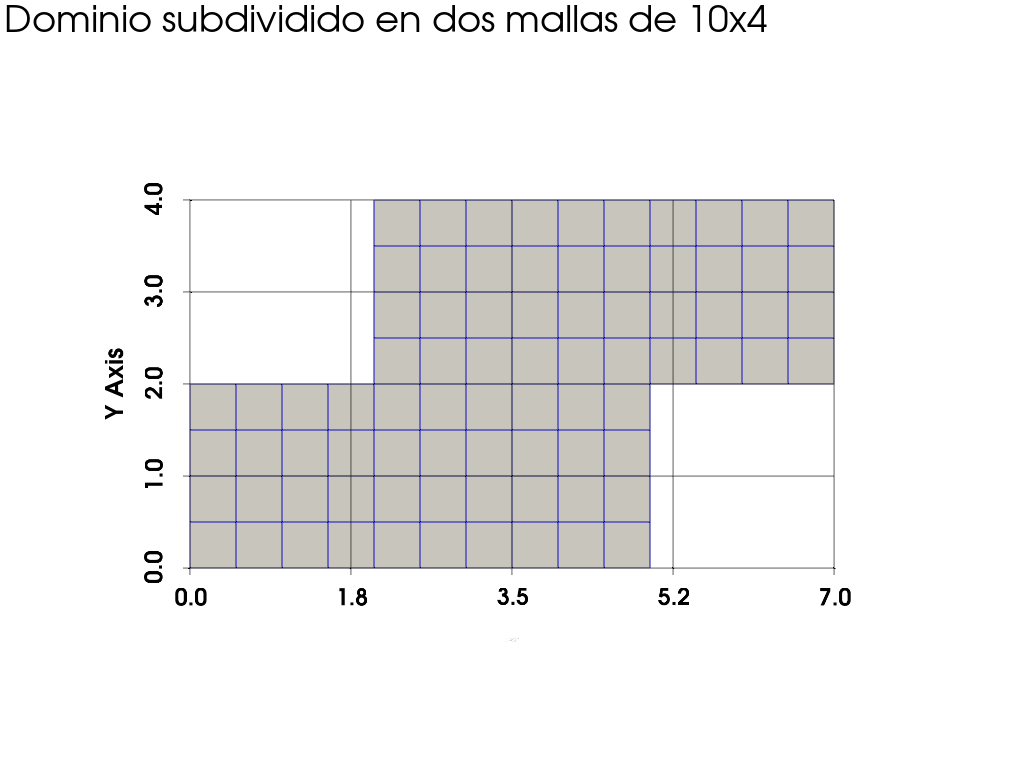

In [10]:
n = 10 # numero de elementos a lo largo del eje horizontal 
z = 4 # numero de elementos a lo largo del eje vertical

ps = [] # puntos de la malla
rs = [] # rectangulos de la malla

# calculo de los puntos y los rectangulos de las mallas
for m in range(len(rectangles)): # iteración entre las dos mallas
    xs = np.linspace(points[rectangles[m][0]][0], points[rectangles[m][1]][0], n+1) # coordenadas de los puntos en el eje horizontal
    ys = np.linspace(points[rectangles[m][0]][1], points[rectangles[m][2]][1], z+1) # coordenadas de los puntos en el eje vertical
    for j in range(z+1):
        for i in range(n+1):
            ps.append([xs[i], ys[j]]) # puntos y sus coordenadas
            
            if (j == z)|(i == n):
                pass
            else:
                n1 = (j*n + j + i) + m*(n+1)*(z+1) # punto 1 del cuadrilatero 
                n2 = n1 + 1 # punto 2 del cuadrilatero
                n3 = n2+n+1 # punto 3 del cuadrilatero
                n4 = n3-1 # punto 4 del cuadrilatero
                rs.append([n1, n2, n3, n4]) # se almacena el cuadrilatero

cells = [("quad", rs)] # se define los elementos de la malla como cuadrilateros 
mesh = meshio.Mesh(ps, cells) # se almacena la nueva malla

# Visualización de la malla
mesh_pv = pv.wrap(mesh)

pl2 = pv.Plotter()
pl2.add_mesh(mesh_pv, color='white')
pl2.add_mesh(mesh_pv, color="blue", style='wireframe', line_width=1.5)
pl2.add_text(f"Dominio subdividido en dos mallas de {n}x{z}", font_size=20)
pl2.view_xy()
pl2.show_grid()
pl2.show(jupyter_backend='pythreejs')

Seguidamente se procede a realizar una integración con el método de cuadraturas gaussianas para cada rectangulo para posteriormente sumar cada resultado y hallar el valor de la integral requerida.

In [11]:
fun = lambda x, y: np.sin(np.pi*x)*np.cos(np.pi*y)**2 # función simbólica

integral = 0

nx = 3 # numero de puntos de cuadratura en el eje x
ny = 3 # numero de puntos de cuadratura en el eje y

# integral para cada uno de los elementos de la malla
for i in range(len(rs)):
    p0 = ps[rs[i][0]]
    p1 = ps[rs[i][1]]
    p2 = ps[rs[i][2]]
    p3 = ps[rs[i][3]]

    integral_num = gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny)
    
    integral += integral_num

#error relativo:
errorR = (round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3))
print("Integral numérica: ", integral)
print(f"Error relativo: {errorR} %")

Integral numérica:  1.2732498854207883
Error relativo: 0.001 %


# 5. Area superficial
Dado el archivo "Spider.vtk" calcular el area superficial de la malla 

In [9]:
malla = "spider.vtk"                                                #Nombre del archivo de trabajo
spider = meshio.read(malla)                                         #Se lee el archivo con la libreria de trabajo
spider_tri = trimesh.load_mesh(malla)                               #Se lee el archivo con la libreria para las pruebas 

points = spider.points                                              #Extraccion de COORDENADAS
tris = spider.cells[0].data                                         #Extraccion de ELEMENTOS

coordeadas = np.array(points)                                       #Arreglo de las coordenadas
elementos = np.array(tris)                                          #Arreglo de los elementos 

def Area_T(A, B, C):                                                #Funcion para determinar el area de un triangulo dados tres puntos en el plano cartesiano 
    AB = B - A                                      
    AC = C - A                                                      #Se obtienen los vecotres AB y AC 
    cruz = np.cross(AB, AC)                                         #Se calcula el producto cruz de AB x AC 
    modulo =  math.sqrt(sum(pow(element, 2) for element in cruz))   #El calculo del modulo del vector mediante la raiz de la sumatoria de las componentes al cuadrado 
    A = (1/2) * modulo                                              #Area del triangulo que forma la mitad del trapecio calculado mediante el modulo de los vectores 
    return A


print("Estructura de los puntos:")                                  #Se realiza una revision de la estructura de las matrices de trabajo (numero de puntos y elementos)
print("Filas: ", coordeadas.shape[0] )
print("Columnas: ", coordeadas.shape[1] )

print("\nEstructura de los elemntos:")
print("Filas: ", elementos.shape[0] )
print("Columnas: ", elementos.shape[1] )  

areas = []                                                          #Se abre una lista para almacenar el area de cada elemento 
for i in range(len(elementos)):                                     
    P1 = coordeadas[elementos[i][0]]                                #Adquisicion de los puntos "A, B, C" en funcion de los puntos que componen cada elemento
    P2 = coordeadas[elementos[i][1]]
    P3 = coordeadas[elementos[i][2]]
    areas.append(Area_T(P1, P2, P3))                                #Calculo del Area para cada elemento 
As= sum(areas)                                                      #Area total

print('\n----------------------------------------------------------')
print('Area superficial = {} unidades cuadradas'. format(As))
print('----------------------------------------------------------\n')



Estructura de los puntos:
Filas:  4670
Columnas:  3

Estructura de los elemntos:
Filas:  9286
Columnas:  3

----------------------------------------------------------
Area superficial = 28.222445842434823 unidades cuadradas
----------------------------------------------------------

